<a href="https://colab.research.google.com/github/2SUBDA/Breakouts/blob/Week3/AsynchSampleWeek3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# BASED ON EXHIBIT 2.1 FROM MILLER (2015)

# import packages for analysis and modeling
import pandas as pd  # data frame operations

import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

In [2]:
# OBTAIN

dodgers = pd.read_csv("https://raw.githubusercontent.com/2SUBDA/IST_718/master/dodgers.csv", error_bad_lines=False)

/var/folders/50/cmvlyf1x0jxfqm3s7khyhbt40000gn/T/ipykernel_84064/1195814713.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dodgers = pd.read_csv("https://raw.githubusercontent.com/2SUBDA/IST_718/master/dodgers.csv", error_bad_lines=False)


In [24]:
# SCRUB / EXPLORE

print("\nContents of dodgers data frame ---------------")

# attendance in thousands for plotting 
dodgers['attend_000'] = dodgers['attend']/1000

# print the first five rows of the data frame
pd.DataFrame.head(dodgers)
dodgerDF = pd.DataFrame(dodgers)
dodgerDF


Contents of dodgers data frame ---------------


,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,division,attend_000,ordered_day_of_week,ordered_month,runiform
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,Divisional,56.000,2Tuesday,1April,0.191519
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,Cross,29.729,3Wednesday,1April,0.622109
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,Cross,28.328,4Thursday,1April,0.437728
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,Cross,31.601,5Friday,1April,0.785359
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,Divisional,46.549,6Saturday,1April,0.779976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO,Divisional,40.724,6Saturday,6Sept,0.416754
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO,Cross,35.607,7Sunday,6Sept,0.535852
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO,Cross,33.624,1Monday,7Oct,0.006209
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO,Divisional,42.473,2Tuesday,7Oct,0.300642


In [25]:
# SCRUB

mondays = dodgers[dodgers['day_of_week'] == 'Monday']
tuesdays = dodgers[dodgers['day_of_week'] == 'Tuesday']
wednesdays = dodgers[dodgers['day_of_week'] == 'Wednesday']
thursdays = dodgers[dodgers['day_of_week'] == 'Thursday']
fridays = dodgers[dodgers['day_of_week'] == 'Friday']
saturdays = dodgers[dodgers['day_of_week'] == 'Saturday']
sundays = dodgers[dodgers['day_of_week'] == 'Sunday']

# convert days' attendance into list of vectors for box plot
data = [mondays['attend_000'], tuesdays['attend_000'], 
    wednesdays['attend_000'], thursdays['attend_000'], 
    fridays['attend_000'], saturdays['attend_000'], 
    sundays['attend_000']]
ordered_day_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

ordered_team_names = (sorted(set(dodgers['opponent']), reverse = True))

# print the first five rows of the data frame
pd.DataFrame.head(dodgers)
dodgerDF = pd.DataFrame(dodgers)
dodgerDF

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,division,attend_000,ordered_day_of_week,ordered_month,runiform
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,Divisional,56.000,2Tuesday,1April,0.191519
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,Cross,29.729,3Wednesday,1April,0.622109
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,Cross,28.328,4Thursday,1April,0.437728
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,Cross,31.601,5Friday,1April,0.785359
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,Divisional,46.549,6Saturday,1April,0.779976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO,Divisional,40.724,6Saturday,6Sept,0.416754
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO,Cross,35.607,7Sunday,6Sept,0.535852
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO,Cross,33.624,1Monday,7Oct,0.006209
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO,Divisional,42.473,2Tuesday,7Oct,0.300642


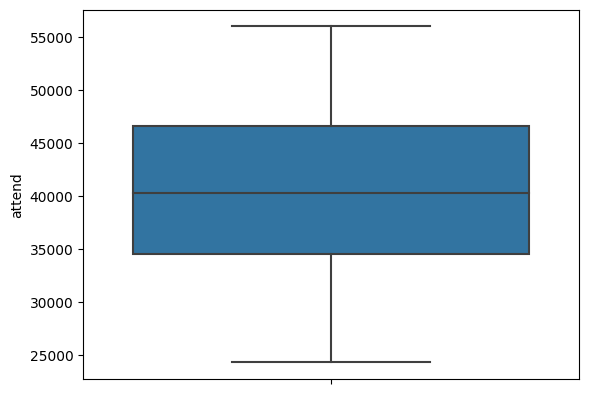

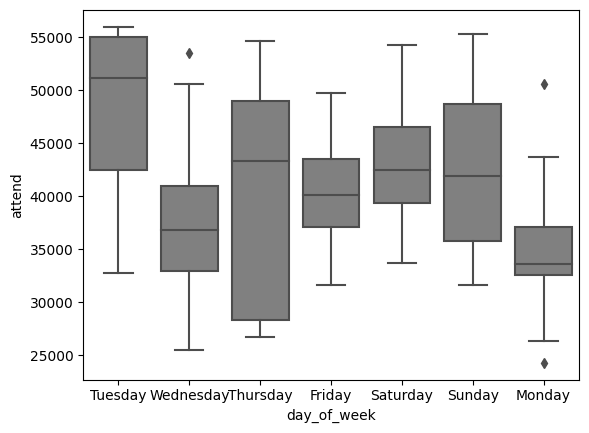

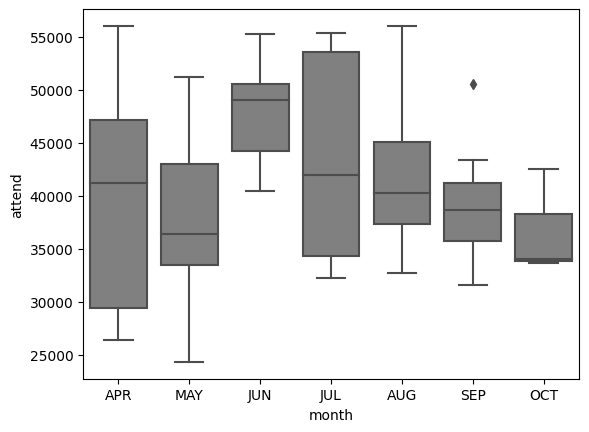

In [5]:
## SUMMARY STATISTICS

np.mean(dodgers['attend'])
# np.min(dodgers['attend'])
# np.max(dodgers['attend'])

sns.boxplot(y="attend", data=dodgers)
plt.show()

sns.boxplot(x="day_of_week", y="attend", data=dodgers, color = "gray");
plt.show()

# NUMBER OF PROMOTIONS - ONLY WORKS WITH BINARY VARIABLES

#cap = np.count_nonzero(dodgers['cap'])
#print(cap)
#shirt = np.count_nonzero(dodgers['shirt'])
#print(shirt)
#fire = np.count_nonzero(dodgers['fireworks'])
#print(fire)
#bob = np.count_nonzero(dodgers['bobblehead'])
#print(bob)

#print(cap + shirt + fire + bob)

sns.boxplot(x="month", y="attend", data=dodgers, color = "gray")
plt.show()

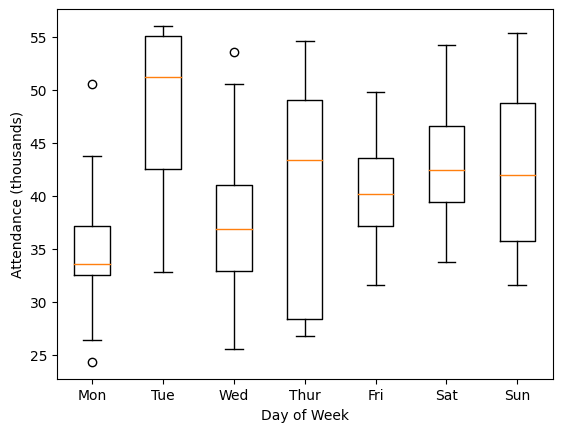

In [27]:
# EXPLORE
# FROM MILLER (2015)
fig, axis = plt.subplots()
axis.set_xlabel('Day of Week')
axis.set_ylabel('Attendance (thousands)')
day_plot = plt.boxplot(data, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_day_names)
#plt.show()
plt.savefig('fig_advert_promo_dodgers_eda_day_of_week_Python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    #orientation='portrait', papertype=None, format=None,
    orientation='portrait', format=None, 
    transparent=True, pad_inches=0.25) 
plt.show()

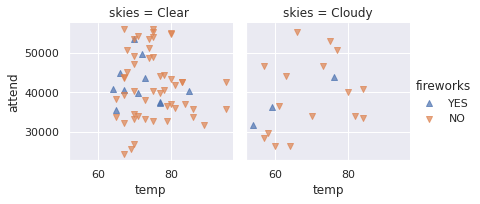

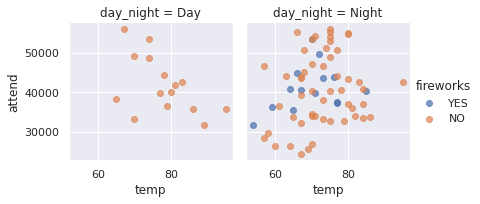

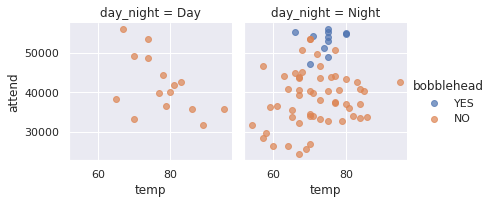

In [ ]:
# EXPLORE
# trellis/lattice plot attendance by temp, conditioning on skies 
# and day_night with bobblehead NO/YES shown in distinct colors
import seaborn as sns

sns.set(style="darkgrid")

g = sns.FacetGrid(dodgers, col="skies", hue="fireworks", 
                  hue_order=["YES", "NO"],
                  hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

g = sns.FacetGrid(dodgers, col="day_night", hue="fireworks",
                hue_order=["YES", "NO"],)
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

g = sns.FacetGrid(dodgers, col="day_night", hue="bobblehead",
                hue_order=["YES", "NO"],)
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

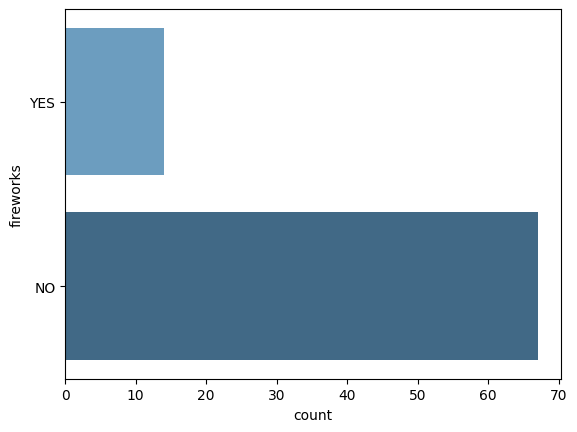

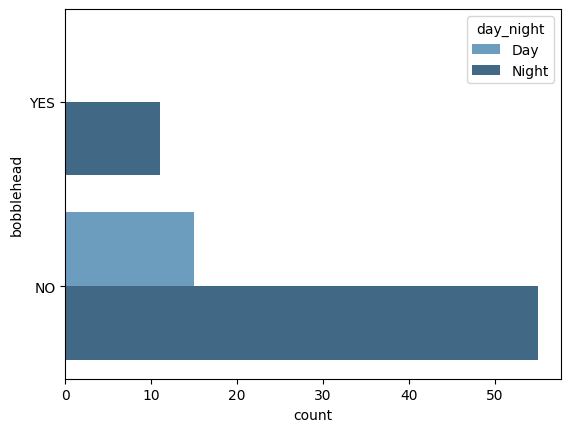

In [7]:
# EXPLORE - DODGER PROMOTIONS BY TYPE

sns.countplot(y="fireworks", data=dodgers, palette="Blues_d",
             order=["YES", "NO"])
#g.add_legend();
plt.show()

sns.countplot(y="bobblehead", hue="day_night",
                data=dodgers, palette="Blues_d",
                order=["YES", "NO"])
#g.add_legend();
plt.show()

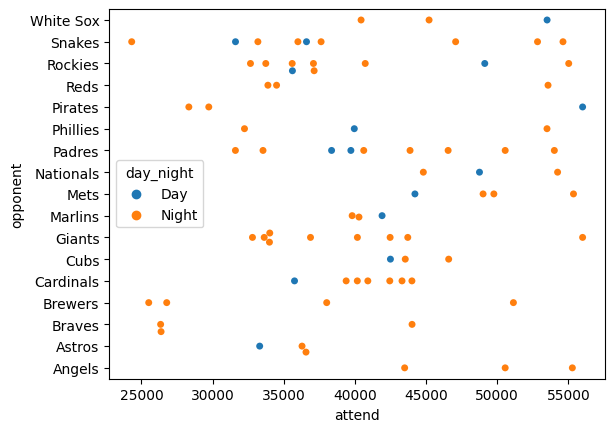

In [8]:
# EXPLORE - Dodgers attendance by Visiting Team
# Figure 2.4 from Miller

# teams = sorted(["opponent"], reverse=True)
sns.swarmplot(x="attend", y="opponent", hue="day_night", 
              data=dodgers, order =ordered_team_names)
#g.add_legend();
plt.show()

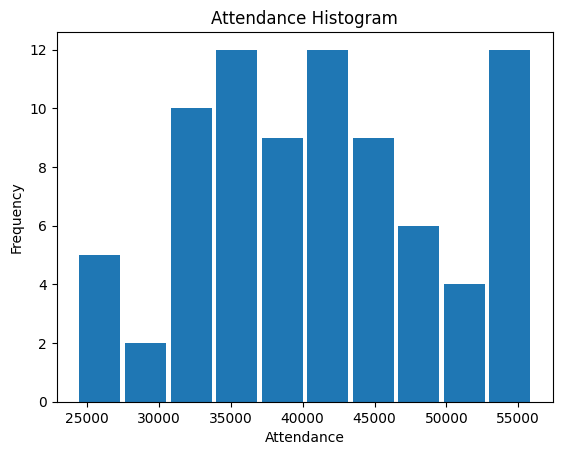

In [9]:
# EXPLORE - CREATE A HISTOGRAM OF ATTENDANCE

# CREATE BINS

plt.hist(dodgers['attend'], density= False, stacked = False, rwidth = .9)
plt.title("Attendance Histogram")
plt.xlabel('Attendance')
plt.ylabel('Frequency')

plt.show()

In [10]:
# SCRUB

# BLOCK FOR ORDERING DATA

# map day_of_week to ordered_day_of_week 
day_to_ordered_day = {'Monday' : '1Monday', 
    'Tuesday' : '2Tuesday', 
    'Wednesday' : '3Wednesday', 
    'Thursday' : '4Thursday', 
    'Friday' : '5Friday',
    'Saturday' : '6Saturday',
    'Sunday' : '7Sunday'}
dodgers['ordered_day_of_week'] = dodgers['day_of_week'].map(day_to_ordered_day)   

# map month to ordered_month
month_to_ordered_month = {'APR' : '1April', 
     'MAY' : '2May', 
     'JUN' : '3June', 
     'JUL' : '4July', 
     'AUG' : '5Aug',
     'SEP' : '6Sept',
     'OCT' : '7Oct'}
dodgers['ordered_month'] = dodgers['month'].map(month_to_ordered_month)

In [28]:
# SCRUB

# employ training-and-test regimen for model validation
np.random.seed(1234)
dodgers['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(dodgers))
dodgers_train = dodgers[dodgers['runiform'] >= 0.33]
dodgers_test = dodgers[dodgers['runiform'] < 0.33]
# check training data frame
print('\ndodgers_train data frame (rows, columns): ',dodgers_train.shape)
print(dodgers_train.head())
# check test data frame
print('\ndodgers_test data frame (rows, columns): ',dodgers_test.shape)
dodgers_test.head()


dodgers_train data frame (rows, columns):  (57, 17)
  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   
7   APR   24   44014     Tuesday   Braves    63  Cloudy     Night  NO    NO   

  fireworks bobblehead    division  attend_000 ordered_day_of_week  \
1        NO         NO       Cross      29.729          3Wednesday   
2        NO         NO       Cross      28.328           4Thursday   
3       YES         NO       Cross      31.601             5Friday   
4        NO         NO  Divisional      46.549           6Saturday   
7        NO         NO  Divisional      44.014            2Tuesday   

  ordered_month  runiform  
1        1April  0.6221

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,division,attend_000,ordered_day_of_week,ordered_month,runiform
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,Divisional,56.000,2Tuesday,1April,0.191519
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO,Cross,38.359,7Sunday,1April,0.272593
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO,Cross,26.376,1Monday,1April,0.276464
17,MAY,13,49124,Sunday,Rockies,70,Clear,Day,NO,NO,NO,NO,Divisional,49.124,7Sunday,2May,0.013768
22,MAY,20,44005,Sunday,Cardinals,77,Clear,Night,NO,NO,NO,NO,Divisional,44.005,7Sunday,2May,0.075381


What is the difference between continuous and categorical variables?¶


# And why should we care?¶


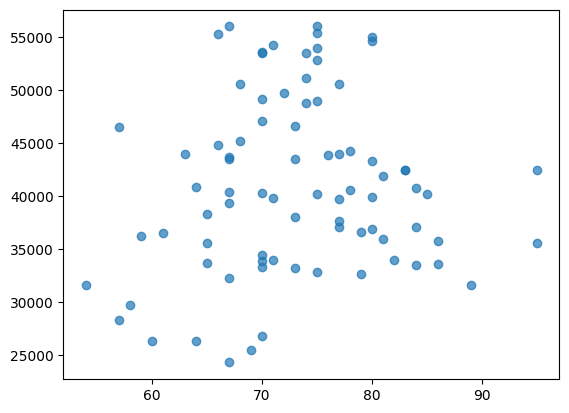

In [12]:
# LETS LOOK AT ATTEND AS A FUNCTION OF TEMP AGAIN

plt.scatter("temp", "attend", alpha=.7, data=dodgers)
plt.show()

Do we think Attend ~ f(Temp) will work well?

In [13]:
# MODEL - Single Variable linear regression

# specify a simple model with attend as a function of temp
my_model_simple = str('attend ~ temp')

# fit the model to the training set
train_model_fit = smf.ols(my_model_simple, data = dodgers_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
dodgers_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
dodgers_test['predict_attend'] = train_model_fit.predict(dodgers_test)

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9075
Date:                Tue, 25 Apr 2023   Prob (F-statistic):              0.345
Time:                        18:44:04   Log-Likelihood:                -595.47
No. Observations:                  57   AIC:                             1195.
Df Residuals:                      55   BIC:                             1199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.192e+04   9899.922      3.225      0.0

/var/folders/50/cmvlyf1x0jxfqm3s7khyhbt40000gn/T/ipykernel_84064/301543821.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dodgers_train['predict_attend'] = train_model_fit.fittedvalues
/var/folders/50/cmvlyf1x0jxfqm3s7khyhbt40000gn/T/ipykernel_84064/301543821.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dodgers_test['predict_attend'] = train_model_fit.predict(dodgers_test)


In [14]:
# MODEL

my_model = str('attend ~ ordered_month + ordered_day_of_week + temp')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = dodgers_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
dodgers_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
dodgers_test['predict_attend'] = train_model_fit.predict(dodgers_test)

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     2.910
Date:                Tue, 25 Apr 2023   Prob (F-statistic):            0.00420
Time:                        18:44:05   Log-Likelihood:                -577.95
No. Observations:                  57   AIC:                             1184.
Df Residuals:                      43   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

/var/folders/50/cmvlyf1x0jxfqm3s7khyhbt40000gn/T/ipykernel_84064/2376146048.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dodgers_train['predict_attend'] = train_model_fit.fittedvalues
/var/folders/50/cmvlyf1x0jxfqm3s7khyhbt40000gn/T/ipykernel_84064/2376146048.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dodgers_test['predict_attend'] = train_model_fit.predict(dodgers_test)


In [15]:
# MODEL

my_model = str('attend ~ ordered_month + ordered_day_of_week + temp + division')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = dodgers_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
dodgers_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
dodgers_test['predict_attend'] = train_model_fit.predict(dodgers_test)

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     10.21
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           2.08e-09
Time:                        18:44:05   Log-Likelihood:                -553.69
No. Observations:                  57   AIC:                             1137.
Df Residuals:                      42   BIC:                             1168.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

/var/folders/50/cmvlyf1x0jxfqm3s7khyhbt40000gn/T/ipykernel_84064/982700825.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dodgers_train['predict_attend'] = train_model_fit.fittedvalues
/var/folders/50/cmvlyf1x0jxfqm3s7khyhbt40000gn/T/ipykernel_84064/982700825.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dodgers_test['predict_attend'] = train_model_fit.predict(dodgers_test)


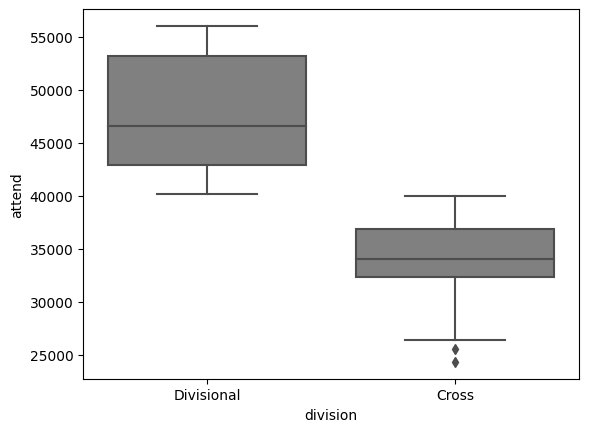

In [16]:
# WHY DOES THIS WORK?

# EXPLORE

sns.boxplot(x="division", y="attend", data=dodgers, color = "gray")
plt.show()

In [17]:
# MODEL
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(dodgers_test['attend'].corr(dodgers_test['predict_attend']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model, data = dodgers).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of Divisional Game on Attendance: ',\
    round(my_model_fit.params[13],0))
    
# Suggestions for the student: Reproduce the figures in this chapter
# using matplotlib, ggplot, and/or rpy2 calls to R graphics. 
# Examine regression diagnostics for the fitted model.
# Examine other linear predictors and other explanatory variables.
# See if you can improve upon the model with variable transformations.


Proportion of Test Set Variance Accounted for:  0.654
                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     13.39
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           2.96e-14
Time:                        18:44:06   Log-Likelihood:                -790.86
No. Observations:                  81   AIC:                             1612.
Df Residuals:                      66   BIC:                             1648.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

/var/folders/50/cmvlyf1x0jxfqm3s7khyhbt40000gn/T/ipykernel_84064/4285079013.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dodgerDF.corr()


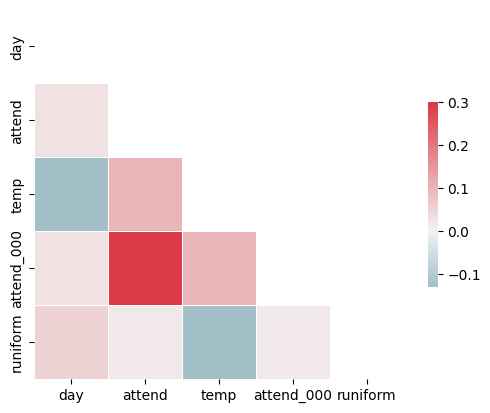

In [19]:
# EXPLORE
corr = dodgerDF.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Do we have to use statsmodel?
Don't we have other choices?

Learn more [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [20]:
# EXPLORE
dodgers.head()


,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,division,attend_000,ordered_day_of_week,ordered_month,runiform
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,Divisional,56.000,2Tuesday,1April,0.191519
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,Cross,29.729,3Wednesday,1April,0.622109
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,Cross,28.328,4Thursday,1April,0.437728
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,Cross,31.601,5Friday,1April,0.785359
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,Divisional,46.549,6Saturday,1April,0.779976


In [21]:
# SCRUB

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

# There are many ways to subset data - this is one
dodgersX = dodgers[['temp']]
dodgersY = dodgers[['attend']]

In [22]:
# MODEL

# Create a basic linear model

model_new = LinearRegression().fit(dodgersX, dodgersY)

model_new.score(dodgersX, dodgersY)

0.009791247146878512

In [23]:
model_new.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}